In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import time
import json
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

tf.__version__

'2.10.1'

In [2]:
DATA_DIR = 'D:/BISAG_Project/EXPERIMENTAL_TESTING/ZZZ/GENC5/'
H, W, C = 100, 120, 3  # height, width, 3(RGB channels)
N_LABELS = 256
D = 5 # num_per_image

In [3]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None
# def parse_filepath(filepath):
#     try:
#         path, filename = os.path.split(filepath)
#         filename, ext = os.path.splitext(filename)
#         return filename
#     except Exception as e:
#         print('error to parse %s. %s' % (filepath, e))
#         return None, None

In [4]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.png"))
attributes = list(map(parse_filepath, files))
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['label', 'file']
df = df.dropna()
df.head()
# files = glob.glob(os.path.join(DATA_DIR, "*.png"))
# attributes = list(map(parse_filepath, files))
# df = pd.DataFrame(attributes)
# df['file'] = files
# df.columns = ['label', 'file']
# df = df.dropna()
# df['num_chars'] = df['label'].apply(len)
# df = df[df['num_chars'] < 6]  # remove images with more than 5 characters
# df = df.reset_index(drop=True)
# df.head()

,label,file
0,0007r,D:/BISAG_Project/EXPERIMENTAL_TESTING/ZZZ/GENC...
1,0007s,D:/BISAG_Project/EXPERIMENTAL_TESTING/ZZZ/GENC...
2,0008x,D:/BISAG_Project/EXPERIMENTAL_TESTING/ZZZ/GENC...
3,0009u,D:/BISAG_Project/EXPERIMENTAL_TESTING/ZZZ/GENC...
4,000bk,D:/BISAG_Project/EXPERIMENTAL_TESTING/ZZZ/GENC...


In [5]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * 0.7)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]
# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.7)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]
print('train count: %s, valid count: %s, test count: %s' % (len(train_idx), len(valid_idx), len(test_idx)))
# n = len(df)
# p = np.random.permutation(n)
# train_up_to = int(0.7 * n)
# val_up_to = int(0.15 * n)
# train_idx = p[:train_up_to]
# valid_idx = p[train_up_to:train_up_to+val_up_to]
# test_idx = p[train_up_to+val_up_to:]
# print('train count: %s, valid count: %s, test count: %s' % (len(train_idx), len(valid_idx), len(test_idx)))

train count: 273513, valid count: 117220, test count: 167458


In [6]:
from tensorflow.keras.utils import to_categorical
from PIL import Image
def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, label = r['file'], r['label']
            im = Image.open(file)
#             im = im.resize((H, W))
            im = np.array(im) / 255.0
            images.append(np.array(im))
            labels.append(np.array([np.array(to_categorical(ord(i), N_LABELS)) for i in label]))
            if len(images) >= batch_size:
#                 print(np.array(images), np.array(labels))
                yield np.array(images), np.array(labels)
                images, labels = [], []
        if not for_training:
            break

In [ ]:
# from tensorflow.keras.utils import to_categorical
# from PIL import Image
# def get_data_generator(df, indices, for_training, batch_size=16):
#     images = []
#     labels = [[] for _ in range(5)]  # 5 separate output labels
#     while True:
#         for i in indices:
#             r = df.iloc[i]
#             file, label = r['file'], r['label']
#             im = Image.open(file)
#             im = im.resize((W, H), resample=Image.Resampling.LANCZOS)
#             im = np.array(im) / 255.0
#             images.append(im)
#             for j, char in enumerate(label):
#                 labels[j].append(to_categorical(ord(char), N_LABELS))
#             if len(images) >= batch_size:
#                 # Pad output labels to maximum length
#                 max_label_len = max([len(l) for l in labels])
#                 padded_labels = [np.zeros((batch_size, N_LABELS)) for _ in range(5)]
#                 for j in range(5):
#                     padded_label = padded_labels[j]
#                     for k in range(batch_size):
#                         if k < len(labels[j]):
#                             padded_label[k] = labels[j][k]
#                 yield np.array(images), padded_labels
#                 images = []
#                 labels = [[] for _ in range(5)]
#         if not for_training:
#             break


In [7]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

# input_layer = tf.keras.Input(shape=(H, W, C))
# x = layers.Conv2D(32, 3, activation='relu')(input_layer)
# x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D((2, 2))(x)

# x = layers.Flatten()(x)
# x = layers.Dense(1024, activation='relu')(x)
# # x = layers.Dropout(0.5)(x)

# x = layers.Dense(D * N_LABELS, activation='softmax')(x)
# x = layers.Reshape((D, N_LABELS))(x)

# model = models.Model(inputs=input_layer, outputs=x)

# model.compile(optimizer='adam', 
#               loss='categorical_crossentropy',
#               metrics= ['accuracy'])
# model.summary()

input_layer = tf.keras.Input(shape=(H, W, C))

x = layers.Conv2D(32, 3, activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(D * N_LABELS, activation='softmax')(x)
x = layers.Reshape((D, N_LABELS))(x)

model = models.Model(inputs=input_layer, outputs=x)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 118, 32)       896       
                                                                 
 batch_normalization (BatchN  (None, 98, 118, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 57, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 47, 57, 64)       256   

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size = 64
valid_batch_size = 64
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

# callbacks = [
#     ModelCheckpoint("./model_checkpoint", monitor='val_loss')
# ]

history = model.fit(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=10,
#                     callbacks=callbacks,
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)

Epoch 1/10
4273/4273 [==============================] - 504s 118ms/step - loss: 2.3898 - accuracy: 0.2988 - val_loss: 0.5807 - val_accuracy: 0.8287
Epoch 2/10
4273/4273 [==============================] - 471s 110ms/step - loss: 0.7012 - accuracy: 0.7740 - val_loss: 0.8677 - val_accuracy: 0.7531
Epoch 3/10
4273/4273 [==============================] - 462s 108ms/step - loss: 0.4507 - accuracy: 0.8564 - val_loss: 0.3196 - val_accuracy: 0.9115
Epoch 4/10
4273/4273 [==============================] - 455s 106ms/step - loss: 0.3476 - accuracy: 0.8904 - val_loss: 0.1676 - val_accuracy: 0.9525
Epoch 5/10
4273/4273 [==============================] - 460s 108ms/step - loss: 0.2904 - accuracy: 0.9093 - val_loss: 0.1505 - val_accuracy: 0.9578
Epoch 6/10
4273/4273 [==============================] - 474s 111ms/step - loss: 0.2526 - accuracy: 0.9218 - val_loss: 0.0823 - val_accuracy: 0.9786
Epoch 7/10
4273/4273 [==============================] - 458s 107ms/step - loss: 0.2281 - accuracy: 0.9301 - val_

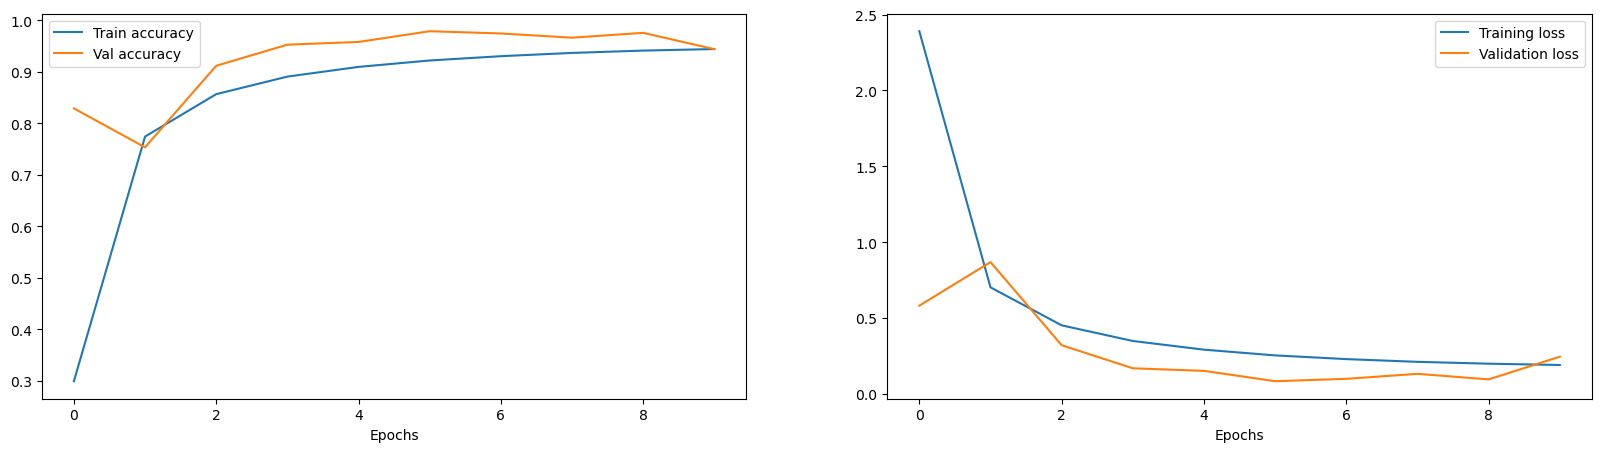

In [10]:
def plot_train_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].plot(history.history['accuracy'], label='Train accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend() 

    axes[1].plot(history.history['loss'], label='Training loss')
    axes[1].plot(history.history['val_loss'], label='Validation loss')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()

plot_train_history(history)
plt.show()

In [11]:
# evaluate loss and accuracy in test dataset
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx)//128)))

1308/1308 [==============================] - 206s 157ms/step - loss: 0.2434 - accuracy: 0.9438


{'loss': 0.24342726171016693, 'accuracy': 0.943795382976532}

In [12]:
test_gen = get_data_generator(df, test_idx, for_training=False, batch_size=128)
x_test, y_test = next(test_gen)

y_pred = model.predict_on_batch(x_test)

y_true = tf.math.argmax(y_test, axis=-1)
y_pred = tf.math.argmax(y_pred, axis=-1)

In [14]:
def format_y(y):
    return ''.join(map(lambda x: chr(int(x)), y))

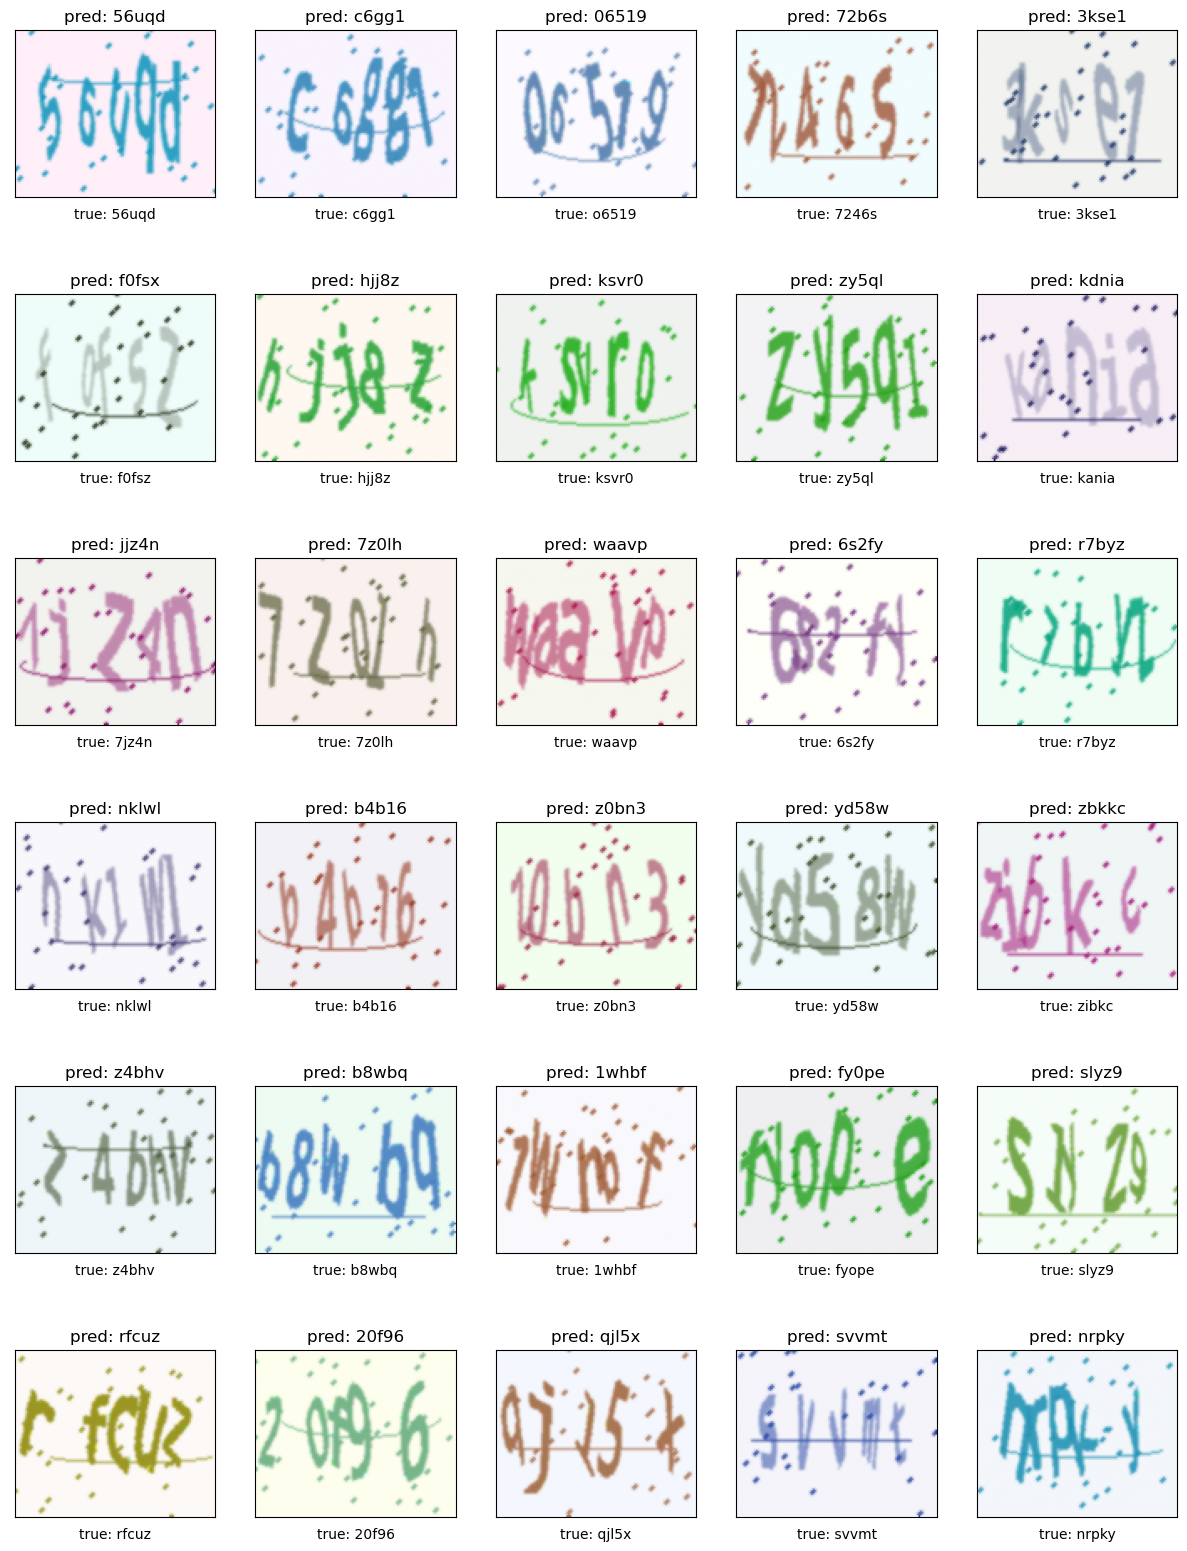

In [25]:
import math
ntr=0
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(x_test[img_idx])
    if format_y(y_pred[img_idx]) != format_y(y_true[img_idx]):
        ntr=ntr+1
    ax.set_title('pred: %s' % format_y(y_pred[img_idx]))
    ax.set_xlabel('true: %s' % format_y(y_true[img_idx]))
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [26]:
ntr

7

In [29]:
# model.save('Model5char_2.h5')

In [31]:
# from PIL import Image

# # Assuming you have an image file path and the trained model
# image_path = 'D:/BISAG_Project/EXPERIMENTAL_TESTING/ZZZ/hb1g_jnsdy26chv7hpto0.png'

# # Load the image and preprocess it
# image = Image.open(image_path).resize((120, 100))
# image = np.array(image) / 255.0
# image = np.expand_dims(image, axis=0)  # add a batch dimension

# # Predict on the image
# predictions = model.predict(image)

# # Process the predictions
# # Reshape the predictions to match the output shape of the model
# reshaped_preds = np.array(predictions).transpose((1, 0, 2))  # (1, sequence_len, N_LABELS)
# # Decode the predictions to get the predicted label
# # predicted_label = decode_predictions(reshaped_preds)[0]
# predicted_label = decode_predictions(reshaped_preds)[0]

In [32]:
# predicted_label